#### Part 1 of week 3's homework task
The aim is to plot **confusion matrices** and **ROC Curves** for various models, as well as learning more about evaluation metrics so that I am able to compare model performances.

In [9]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 

# Initialise dataset
df = pd.read_csv("Diabetes-Classification.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         128 non-null    int64  
 1   Gender                      128 non-null    object 
 2   BMI                         125 non-null    float64
 3   Blood Pressure              128 non-null    object 
 4   FBS                         128 non-null    int64  
 5   HbA1c                       128 non-null    float64
 6   Family History of Diabetes  126 non-null    object 
 7   Smoking                     126 non-null    object 
 8   Diet                        126 non-null    object 
 9   Exercise                    127 non-null    object 
 10  Diagnosis                   128 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 11.1+ KB


In [10]:
# Clean up dataset
df = df.dropna()
df.isnull().sum()


Age                           0
Gender                        0
BMI                           0
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    0
Smoking                       0
Diet                          0
Exercise                      0
Diagnosis                     0
dtype: int64

In [11]:
df.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25.0,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30.0,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35.0,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40.0,High,160,7.8,Yes,Yes,Poor,No,Yes
5,50,Female,25.0,Normal,100,5.7,No,No,Healthy,Regular,No


In [12]:
# One hot encoding for categorical data 
encode_cols = ["Gender", "Blood Pressure", "Family History of Diabetes", "Smoking", "Diet", "Exercise"]
one_encoded = pd.get_dummies(df, columns = encode_cols, dtype = int)
one_encoded.head()

,Age,BMI,FBS,HbA1c,Diagnosis,Gender_Female,Gender_Male,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Family History of Diabetes_No,Family History of Diabetes_Yes,Smoking_No,Smoking_Yes,Diet_Healthy,Diet_Poor,Exercise_No,Exercise_Regular
0,45,25.0,100,5.7,No,0,1,0,0,1,1,0,1,0,1,0,0,1
1,55,30.0,120,6.4,Yes,1,0,1,0,0,0,1,0,1,0,1,1,0
2,65,35.0,140,7.1,Yes,0,1,1,0,0,0,1,0,1,0,1,1,0
3,75,40.0,160,7.8,Yes,1,0,1,0,0,0,1,0,1,0,1,1,0
5,50,25.0,100,5.7,No,1,0,0,0,1,1,0,1,0,1,0,0,1


In [13]:
# Binary encoding for target variable
fully_encoded = one_encoded.copy()
fully_encoded["Diagnosis"] = one_encoded["Diagnosis"].map({"No": 0, "Yes": 1})
fully_encoded.head()

,Age,BMI,FBS,HbA1c,Diagnosis,Gender_Female,Gender_Male,Blood Pressure_High,Blood Pressure_Low,Blood Pressure_Normal,Family History of Diabetes_No,Family History of Diabetes_Yes,Smoking_No,Smoking_Yes,Diet_Healthy,Diet_Poor,Exercise_No,Exercise_Regular
0,45,25.0,100,5.7,0,0,1,0,0,1,1,0,1,0,1,0,0,1
1,55,30.0,120,6.4,1,1,0,1,0,0,0,1,0,1,0,1,1,0
2,65,35.0,140,7.1,1,0,1,1,0,0,0,1,0,1,0,1,1,0
3,75,40.0,160,7.8,1,1,0,1,0,0,0,1,0,1,0,1,1,0
5,50,25.0,100,5.7,0,1,0,0,0,1,1,0,1,0,1,0,0,1


Dataset is ready for use

Chosen models for evaluation are Logistic Regression, Random Forest 

In [24]:
# Feature Selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Top 5 Categorical Features
cat_selector = SelectKBest(score_func = chi2, k = 5)
x_cat = fully_encoded.drop(["Diagnosis", "BMI", "Age", "FBS", "HbA1c"], axis = 1)
y = fully_encoded["Diagnosis"]

x_selected = cat_selector.fit_transform(x_cat, y) #train selector on datset
cat_selected = x_cat.columns[cat_selector.get_support()]
print (f"Categorical selected features:\n", cat_selected)

#Top 2 Numeric Features
num_selector = SelectKBest(score_func = f_classif, k = 2)
x_num = fully_encoded.drop(["Diagnosis", "Gender_Female", "Gender_Male", "Family History of Diabetes_No", "Family History of Diabetes_Yes", "Smoking_No", "Smoking_Yes", "Diet_Healthy", "Diet_Poor", "Exercise_No", "Exercise_Regular"], axis = 1)

xnum_selected = num_selector.fit_transform(x_num, y) 
num_selected = x_num.columns[num_selector.get_support()]
print (f"\nNumerical selected features:\n", num_selected)

Categorical selected features:
 Index(['Family History of Diabetes_Yes', 'Smoking_No', 'Diet_Healthy',
       'Exercise_No', 'Exercise_Regular'],
      dtype='object')

Numerical selected features:
 Index(['FBS', 'HbA1c'], dtype='object')


In [25]:
# Combine selected features
import pandas as pd
all_selected = pd.concat([pd.DataFrame(x_cat, columns = cat_selected),
                        pd.DataFrame(x_num, columns = num_selected)], axis=1)
print("Combined Selected Features:\n", all_selected.columns.tolist())

# Train-test split on selected features 
from sklearn.model_selection import train_test_split

x_test, x_train, y_test, y_train = train_test_split(all_selected, y, test_size = 0.3, random_state = 42)


Combined Selected Features:
 ['Family History of Diabetes_Yes', 'Smoking_No', 'Diet_Healthy', 'Exercise_No', 'Exercise_Regular', 'FBS', 'HbA1c']


In [34]:
# Linear Regression on selected features 
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(class_weight = "balanced", max_iter = 1000)
log_reg.fit(x_train, y_train)
diagpred_logreg = log_reg.predict(x_test)

In [36]:
# Apply Random Forest to selected features
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators = 200, max_depth = 10, class_weight = "balanced", random_state = 42)
random_forest.fit(x_train, y_train)
diagpred_ranfor = random_forest.predict(x_test)

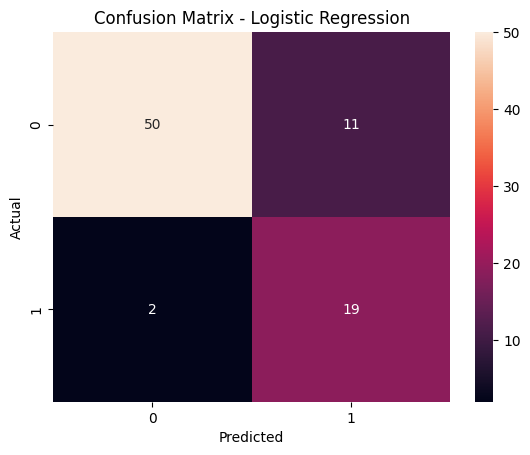

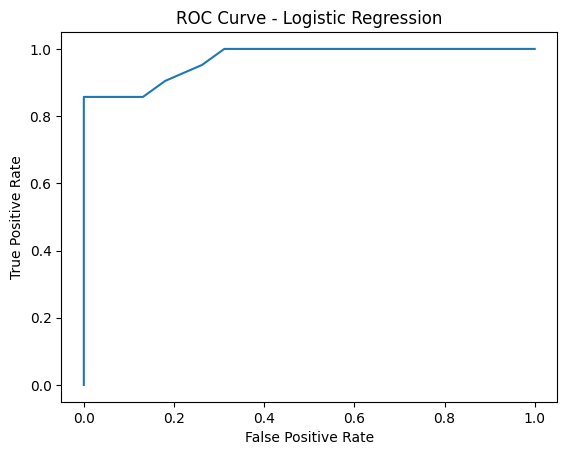

In [44]:
# Evaluate Logistic Regression performance
# Plot confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

cm_logreg = confusion_matrix(y_test, diagpred_logreg)
plt.figure()
sns.heatmap(cm_logreg, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Plot ROC curve
y_proba = log_reg.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.show()


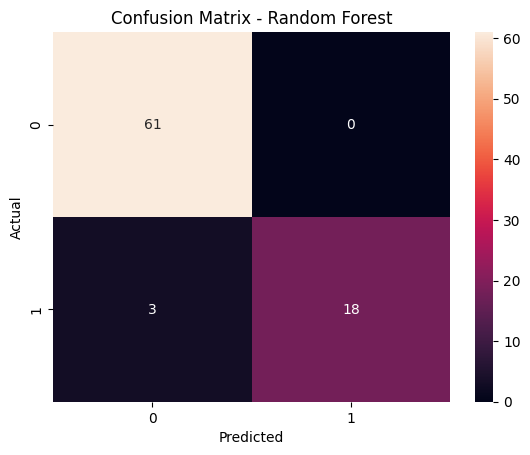

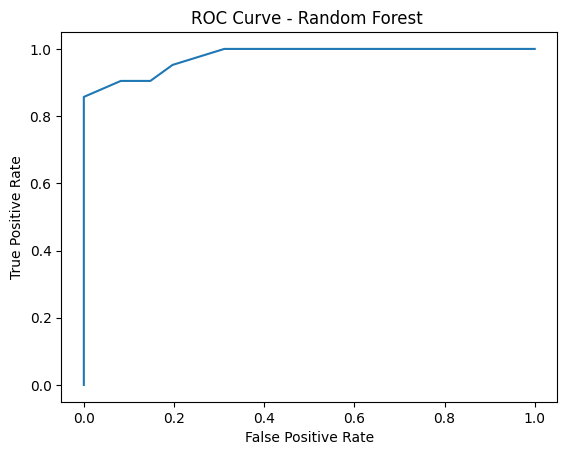

In [45]:
# Evaluate Random Forest performance
# Plot confusion matrices
cm_ranfor = confusion_matrix(y_test, diagpred_ranfor)
plt.figure()
sns.heatmap(cm_ranfor, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Plot ROC curve
y_proba = random_forest.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest ')
plt.show()


#### Conclusions for each model

General notes: dataset is balanced so favour Accuracy over F1 score and False Negatives are more expensive so favour Recall over Precision. 